## Depth integrated tracer on shelf per km along shelf, splitted into inner shelf and outer shelf

This notebooks looks at the **effect of the canyon** on upwelling the inner and outer shelves. Effect of the canyon is defined here as the residual between a run with a canyon bathymetry and one with a flat shelf.

In [1]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

#from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import MetricsPythonTools as mpt


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [4]:
# plotting functions
def plotCanyonPos(ax,UpX,DnX):
    ax.axvline(UpX,color='0.70',linestyle='--')
    ax.axvline(DnX,color='0.70',linestyle='--')

def plotZeroLine(ax):
    ax.axhline(y=0,color='0.70',linestyle='-')
    


In [5]:
#Exp
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' 
CGridOut = Dataset(CGrid)

CGridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc' 
CGridNoCOut = Dataset(CGridNoC)
#------------------------------------------------------------------------------------
Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc' 
PtracersOut = Dataset(Ptracers)

PtracersNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/ptracersGlob.nc' #No canyon
PtracersOutNoC = Dataset(PtracersNoC)
#------------------------------------ Kv ----------------------------------------------
Ptracers11 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/ptracersGlob.nc' 
Ptracers12 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/ptracersGlob.nc' 

Ptracers24 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run24/ptracersGlob.nc' #No canyon
Ptracers25 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run25/ptracersGlob.nc' #No canyon
#----------------------------------- N -----------------------------------------------
Ptracers14 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/ptracersGlob.nc' 
Ptracers15 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/ptracersGlob.nc' 
Ptracers16 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/ptracersGlob.nc' 
Ptracers17 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/ptracersGlob.nc' 

Ptracers26 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run26/ptracersGlob.nc' #No canyon
Ptracers27 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run27/ptracersGlob.nc' #No canyon
Ptracers28 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run28/ptracersGlob.nc' #No canyon
Ptracers30 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run30/ptracersGlob.nc' #No canyon

#---------------------------------- f --------------------------------------------------
Ptracers18 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/ptracersGlob.nc' 
Ptracers19 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/ptracersGlob.nc' 

Ptracers22 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run22/ptracersGlob.nc' #No canyon
Ptracers23 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run23/ptracersGlob.nc' #No canyon
#---------------------------------- Kv 3D ----------------------------------------------
Ptracers043D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/ptracersGlob.nc' 
Ptracers053D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/ptracersGlob.nc' 
Ptracers063D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/ptracersGlob.nc' 
Ptracers073D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/ptracersGlob.nc' 


State = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc' 
StateNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/stateGlob.nc' 



In [6]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 22 # number of tracers in total (CNT =22, 3D = 4, total = 19)

rc = CGridNoCOut.variables['RC']
dxf = CGridNoCOut.variables['dxF']
xc = rout.getField(CGridNoC, 'XC') # x coords tracer cells
yc = rout.getField(CGridNoC, 'YC') # y coords tracer cells

rA = rout.getField(CGridNoC, 'rA') 
depth = rout.getField(CGrid, 'Depth')
drF = CGridNoCOut.variables['drF'] # vertical distance between faces
drC = CGridNoCOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGridNoC, 'HFacC')
mask_NoC = rout.getMask(CGridNoC, 'HFacC')


times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [7]:
def HCW_Tracer_AlongShelf_Split(Tr,MaskC,nzlim,rA,hFacC,drF,yin,yfin,zfin,xi,yi):
  '''
  INPUT----------------------------------------------------------------------------------------------------------------
    Tr    : Array with concentration values for a tracer. Until this function is more general, this should be size 19x90x360x360
    MaskC : Land mask for tracer
    nzlim : The nz index under which to look for water properties
    rA    : Area of cell faces at C points (360x360)
    fFacC : Fraction of open cell (90x360x360)
    drF   : Distance between cell faces (90)
    yin   : first across-shore index of shelf division
    yfin  : final across-shore index of shelf division
    zfin  : shelf break index + 1 
    xi    : initial profile x index
    yi    : initial profile y index
    
    OUTPUT----------------------------------------------------------------------------------------------------------------
    VolWaterHighConc =  Array with the volume of water over the shelf [t,360] at every time output.
    Total_Tracer =  Array with the mass of tracer (m^3*[C]*l/m^3) at each x-position over the shelf [t,360] at 
                    every time output. 
                                                
  -----------------------------------------------------------------------------------------------------------------------
  '''
  maskExp = mpt.maskExpand(MaskC,Tr)

  TrMask=np.ma.array(Tr,mask=maskExp)   
    
  trlim = TrMask[0,nzlim,yi,xi]
    
  print('tracer limit concentration is: ',trlim)
    
    
  # mask cells with tracer concentration < trlim on shelf
  HighConc_Masked = np.ma.masked_less(TrMask[:,:zfin,yin:yfin,:], trlim) 
  HighConc_Mask = HighConc_Masked.mask
    
  #Get volume of water of cells with relatively high concentration
  rA_exp = np.expand_dims(rA[yin:yfin,:],0)
  drF_exp = np.expand_dims(np.expand_dims(drF[:zfin],1),1)
  rA_exp = rA_exp + np.zeros(hFacC[:zfin,yin:yfin,:].shape)
  drF_exp = drF_exp + np.zeros(hFacC[:zfin,yin:yfin,:].shape)
    
  ShelfVolume = hFacC[:zfin,yin:yfin,:]*drF_exp*rA_exp
  ShelfVolume_exp = np.expand_dims(ShelfVolume,0)
  ShelfVolume_exp = ShelfVolume_exp + np.zeros(HighConc_Mask.shape)
    
  HighConc_CellVol = np.ma.masked_array(ShelfVolume_exp,mask = HighConc_Mask) 
  VolWaterHighConc =np.ma.sum(np.ma.sum(HighConc_CellVol,axis = 1),axis=1)
    
   #Get total mass of tracer on shelf
  Total_Tracer = np.ma.sum(np.ma.sum(ShelfVolume_exp*TrMask[:,:zfin,yin:yfin,:]*1000.0,axis = 1),axis=1)
   # 1 m^3 = 1000 l
    
  return (VolWaterHighConc, Total_Tracer)

In [8]:
def HCW_Tracer_AlongShelf_Split(rA,hFacC,drF,yin,yfin,zfin):
    
    rA_exp = np.expand_dims(rA[yin:yfin,:],0)
    drF_exp = np.expand_dims(np.expand_dims(drF[:zfin],1),1)
    rA_exp = rA_exp + np.zeros(hFacC[:zfin,yin:yfin,:].shape)
    drF_exp = drF_exp + np.zeros(hFacC[:zfin,yin:yfin,:].shape)
 
    Volume = np.ma.sum(hFacC[:zfin,yin:yfin,:]*drF_exp*rA_exp)
    
    return Volume

y index for shelfbreak, 100m depth and 50 m depth
depth[227,0] is 147.753973 
depth[267,0] is 100.000000 
depth[359,0] is 20.000000 
('Shelf volume ($m^3$) is', 252519140999.81555)
('inner volume ($m^3$) is', 136675732439.04407)
('Outer volume ($m^3$) is', 121104105706.60306)


/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


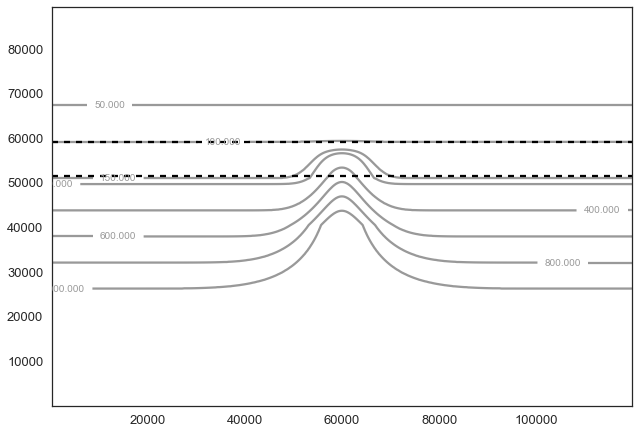

In [9]:
contour = plt.contour(xc[1,:],yc[:,1],depth,[50,100,150,200,400,600,800,1000,1200],colors='0.60')
plt.clabel(contour, inline=1, fontsize=10)
plt.axhline(yc[267,1],color='k',linestyle='--')
plt.axhline(yc[227,1],color='k',linestyle='--')

print('y index for shelfbreak, 100m depth and 50 m depth')
print('depth[227,0] is %f ' % depth[227,0])
print('depth[267,0] is %f ' % depth[267,0])
print('depth[359,0] is %f ' % depth[359,0])

ShelfVol = HCW_Tracer_AlongShelf_Split(rA,hFacC,drF,227,359,30)
InnerVol = HCW_Tracer_AlongShelf_Split(rA,hFacC,drF,267,359,30)
OuterVol = HCW_Tracer_AlongShelf_Split(rA,hFacC,drF,227,269,30)
print('Shelf volume ($m^3$) is' , ShelfVol)
print('inner volume ($m^3$) is' , InnerVol)
print('Outer volume ($m^3$) is' , OuterVol)

In [10]:
Tr1 = rout.getField(Ptracers, 'Tr1')
Tr1NoC = rout.getField(PtracersNoC, 'Tr1')

## Changing Diffusivity

In [11]:
HCWout,TrMassout = HCW_Tracer_AlongShelf_Split(Tr1,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCWin,TrMassin = HCW_Tracer_AlongShelf_Split(Tr1,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)

HCWNoCout,TrMassNoCout = HCW_Tracer_AlongShelf_Split(Tr1NoC,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCWNoCin,TrMassNoCin = HCW_Tracer_AlongShelf_Split(Tr1NoC,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)



TypeError: HCW_Tracer_AlongShelf_Split() takes exactly 6 arguments (11 given)

In [ ]:
Tra = rout.getField(Ptracers11, 'Tr2')
Trb = rout.getField(Ptracers12, 'Tr3')
Tre = rout.getField(Ptracers17, 'Tr1')

Trc = rout.getField(Ptracers24, 'Tr1')
Trd = rout.getField(Ptracers25, 'Tr1')
Trf = rout.getField(Ptracers30, 'Tr1')

In [ ]:
HCW11out,TrMass11out = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW12out,TrMass12out = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW17out,TrMass17out = HCW_Tracer_AlongShelf_Split(Tre,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)

HCW11in,TrMass11in = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW12in,TrMass12in = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW17in,TrMass17in = HCW_Tracer_AlongShelf_Split(Tre,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)

HCW24out,TrMass24out = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW25out,TrMass25out = HCW_Tracer_AlongShelf_Split(Trd,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW30out,TrMass30out = HCW_Tracer_AlongShelf_Split(Trf,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)

HCW24in,TrMass24in = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW25in,TrMass25in = HCW_Tracer_AlongShelf_Split(Trd,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW30in,TrMass30in = HCW_Tracer_AlongShelf_Split(Trf,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)


In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(HCW17out[ii,:]-HCW30out[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCWout[ii,:]-HCWNoCout[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW11out[ii,:]-HCW24out[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW12out[ii,:]-HCW25out[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["jade"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
ax2.set_title('Outer Shelf, day 2')
    
plt.tight_layout()

In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(HCW17in[ii,:].data-HCW30in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCWin[ii,:].data-HCWNoCin[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW11in[ii,:].data-HCW24in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW12in[ii,:].data-HCW25in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["jade"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
ax2.set_title('Inner Shelf, day 2')
    
plt.tight_layout()



In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(TrMass17out[ii,:]-TrMass30out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMassout[ii,:]-TrMassNoCout[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass11out[ii,:]-TrMass24out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass12out[ii,:]-TrMass25out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["jade"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')
ax2.set_title('Outer Shelf, day 2')
plt.tight_layout()    


In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(TrMass17in[ii,:]-TrMass30in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMassin[ii,:]-TrMassNoCin[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass11in[ii,:]-TrMass24in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass12in[ii,:]-TrMass25in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["jade"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')
ax2.set_title('Inner Shelf, day 2')
plt.tight_layout()    


In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum((TrMass17out-TrMass30out),axis=1)/1.E14,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum((TrMassout-TrMassNoCout),axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum((TrMass11out-TrMass24out),axis=1)/1.E14,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum((TrMass12out-TrMass25out),axis=1)/1.E14,sns.xkcd_rgb["jade"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCW17out-HCW30out,axis=1)/1.E10,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCWout-HCWNoCout,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW11out-HCW24out,axis=1)/1.E10,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW12out-HCW25out,axis=1)/1.E10,sns.xkcd_rgb["jade"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
  
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
ax1.set_title('Outer Shelf')
plt.tight_layout()

plt.show()



In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)
plotZeroLine(ax1)
ax1.plot(tt/2.,np.sum(TrMass17in-TrMass30in,axis=1)/1.E14,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMassin-TrMassNoCin,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass11in-TrMass24in,axis=1)/1.E14,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass12in-TrMass25in,axis=1)/1.E14,sns.xkcd_rgb["jade"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')

ax2.plot(tt/2.,np.sum(HCW17in.data-HCW30in.data,axis=1)/1.E10,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCWin.data-HCWNoCin.data,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW11in.data-HCW24in.data,axis=1)/1.E10,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW12in.data-HCW25in.data,axis=1)/1.E10,sns.xkcd_rgb["jade"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
  
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
ax1.set_title('Inner Shelf')
plt.tight_layout()

plt.show()



## Changing geography of diapycnal diffusivity 

In [ ]:
Tra = rout.getField(Ptracers043D, 'Tr1')
Trb = rout.getField(Ptracers053D, 'Tr1')
Trc = rout.getField(Ptracers063D, 'Tr1')
Trd = rout.getField(Ptracers073D, 'Tr1')

Tre = rout.getField(Ptracers30, 'Tr1')


In [ ]:
HCW043Dout,TrMass043Dout = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW053Dout,TrMass053Dout = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW063Dout,TrMass063Dout = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW073Dout,TrMass073Dout = HCW_Tracer_AlongShelf_Split(Trd,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW30out,TrMass30out = HCW_Tracer_AlongShelf_Split(Tre,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)

HCW043Din,TrMass043Din = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW053Din,TrMass053Din = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW063Din,TrMass063Din = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW073Din,TrMass073Din = HCW_Tracer_AlongShelf_Split(Trd,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW30in,TrMass30in = HCW_Tracer_AlongShelf_Split(Tre,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)

In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(HCWout[ii,:]-HCWNoCout[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW043Dout[ii,:]-HCW30out[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW053Dout[ii,:]-HCW30out[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW063Dout[ii,:]-HCWNoCout[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW073Dout[ii,:]-HCWNoCout[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
ax2.set_title('Outer Shelf, day 2')
plt.tight_layout()    


In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(HCWin[ii,:].data-HCWNoCin[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW043Din[ii,:].data-HCW30in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW053Din[ii,:].data-HCW30in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW063Din[ii,:].data-HCWNoCin[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW073Din[ii,:].data-HCWNoCin[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
ax2.set_title('Inner Shelf, day 2')
plt.tight_layout()    


In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(TrMassout[ii,:]-TrMassNoCout[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass043Dout[ii,:]-TrMass30out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass053Dout[ii,:]-TrMass30out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass063Dout[ii,:]-TrMassNoCout[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass073Dout[ii,:]-TrMassNoCout[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')
ax2.set_title('Outer Shelf, day 2')
    
plt.tight_layout()

In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(TrMassin[ii,:]-TrMassNoCin[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass043Din[ii,:]-TrMass30in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass053Din[ii,:]-TrMass30in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass063Din[ii,:]-TrMassNoCin[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass073Din[ii,:]-TrMassNoCin[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')
ax2.set_title('Inner Shelf, day 2')
    
plt.tight_layout()

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMassout-TrMassNoCout,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass043Dout-TrMass30out,axis=1)/1.E14,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass053Dout-TrMass30out,axis=1)/1.E14,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass063Dout-TrMassNoCout,axis=1)/1.E14,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass073Dout-TrMassNoCout,axis=1)/1.E14,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCWout-HCWNoCout,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW043Dout-HCW30out,axis=1)/1.E10,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW053Dout-HCW30out,axis=1)/1.E10,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW063Dout-HCWNoCout,axis=1)/1.E10,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW073Dout-HCWNoCout,axis=1)/1.E10,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
  
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
ax1.set_title('Outer Shelf')
plt.tight_layout()

plt.show()



In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)
plotZeroLine(ax1)
ax1.plot(tt/2.,np.sum(TrMassin-TrMassNoCin,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass043Din-TrMass30in,axis=1)/1.E14,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass053Din-TrMass30in,axis=1)/1.E14,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass063Din-TrMassNoCin,axis=1)/1.E14,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass073Din-TrMassNoCin,axis=1)/1.E14,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCWin.data-HCWNoCin.data,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW043Din.data-HCW30in.data,axis=1)/1.E10,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW053Din.data-HCW30in.data,axis=1)/1.E10,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW063Din.data-HCWNoCin.data,axis=1)/1.E10,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW073Din.data-HCWNoCin.data,axis=1)/1.E10,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
  
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
ax1.set_title('Inner Shelf')
plt.tight_layout()

plt.show()


## Changing initial stratification

In [ ]:
Tra = rout.getField(Ptracers14, 'Tr1')
Trb = rout.getField(Ptracers15, 'Tr1')
Trc = rout.getField(Ptracers16, 'Tr1')

Trd = rout.getField(Ptracers26, 'Tr1')
Tre = rout.getField(Ptracers27, 'Tr1')
Trf = rout.getField(Ptracers28, 'Tr1')


In [ ]:
HCW14out,TrMass14out = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW15out,TrMass15out = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW16out,TrMass16out = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)

HCW26out,TrMass26out = HCW_Tracer_AlongShelf_Split(Trd,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW27out,TrMass27out = HCW_Tracer_AlongShelf_Split(Tre,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW28out,TrMass28out = HCW_Tracer_AlongShelf_Split(Trf,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)

HCW14in,TrMass14in = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW15in,TrMass15in = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW16in,TrMass16in = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)

HCW26in,TrMass26in = HCW_Tracer_AlongShelf_Split(Trd,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW27in,TrMass27in = HCW_Tracer_AlongShelf_Split(Tre,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW28in,TrMass28in = HCW_Tracer_AlongShelf_Split(Trf,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)


In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(HCW16out[ii,:]-HCW28out[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW14out[ii,:]-HCW26out[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCWout[ii,:]-HCWNoCout[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW15out[ii,:]-HCW27out[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
ax2.set_title('Outer Shelf, day 2')
plt.tight_layout()


In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(HCW16in[ii,:].data-HCW28in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW14in[ii,:].data-HCW26in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCWin[ii,:].data-HCWNoCin[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW15in[ii,:].data-HCW27in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
ax2.set_title('Inner Shelf, day 2')
plt.tight_layout()


In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(TrMass16out[ii,:]-TrMass28out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass14out[ii,:]-TrMass26out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMassout[ii,:]-TrMassNoCout[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass15out[ii,:]-TrMass25out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
   
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')
ax2.set_title('Outer Shelf, day 2')

plt.tight_layout()

In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,(TrMass16in[ii,:]-TrMass28in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass14in[ii,:]-TrMass26in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMassin[ii,:]-TrMassNoCin[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass15in[ii,:]-TrMass27in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
   
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')
ax2.set_title('Inner Shelf, day 2')
plt.tight_layout()

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMass16out-TrMass28out,axis=1)/1.E14,sns.xkcd_rgb["bright red"],marker = 'o',label='$N=3.0E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass14out-TrMass26out,axis=1)/1.E14,sns.xkcd_rgb["blood orange"],marker = 'o',label='$N=3.9E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMassout-TrMassNoCout,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $N=5.5E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass15out-TrMass27out,axis=1)/1.E14,sns.xkcd_rgb["saffron"],marker = 'o',label='$N=6.3E-3s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCW16out-HCW28out,axis=1)/1.E10,sns.xkcd_rgb["bright red"],marker = 'o',label='$N=3.0E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW14out-HCW26out,axis=1)/1.E10,sns.xkcd_rgb["blood orange"],marker = 'o',label='$N=3.9E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCWout-HCWNoCout,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $N=5.5E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW15out-HCW27out,axis=1)/1.E10,sns.xkcd_rgb["saffron"],marker = 'o',label='$N=6.3E-3s^{-1}$')
     
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
ax1.set_title('Outer shelf')
plt.tight_layout()
plt.show()



In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)
plotZeroLine(ax1)
ax1.plot(tt/2.,np.sum(TrMass16in-TrMass28in,axis=1)/1.E14,sns.xkcd_rgb["bright red"],marker = 'o',label='$N=3.0E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass14in-TrMass26in,axis=1)/1.E14,sns.xkcd_rgb["blood orange"],marker = 'o',label='$N=3.9E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMassin-TrMassNoCin,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $N=5.5E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass15in-TrMass27in,axis=1)/1.E14,sns.xkcd_rgb["saffron"],marker = 'o',label='$N=6.3E-3s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCW16in.data-HCW28in.data,axis=1)/1.E10,sns.xkcd_rgb["bright red"],marker = 'o',label='$N=3.0E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW14in.data-HCW26in.data,axis=1)/1.E10,sns.xkcd_rgb["blood orange"],marker = 'o',label='$N=3.9E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCWin.data-HCWNoCin.data,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $N=5.5E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW15in.data-HCW27in.data,axis=1)/1.E10,sns.xkcd_rgb["saffron"],marker = 'o',label='$N=6.3E-3s^{-1}$')
     
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
ax1.set_title('Inner shelf')
plt.tight_layout()
plt.show()



## Changing latitude (f)

In [ ]:
Tra = rout.getField(Ptracers18, 'Tr1')
Trb = rout.getField(Ptracers19, 'Tr1')
Trc = rout.getField(Ptracers22, 'Tr1')
Trd = rout.getField(Ptracers23, 'Tr1')

In [ ]:
HCW18out,TrMass18out = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW19out,TrMass19out = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW22out,TrMass22out = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW23out,TrMass23out = HCW_Tracer_AlongShelf_Split(Trd,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)

HCW18in,TrMass18in = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW19in,TrMass19in = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW22in,TrMass22in = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW23in,TrMass23in = HCW_Tracer_AlongShelf_Split(Trd,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)


In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(HCWout[ii,:]-HCWNoCout[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW18out[ii,:]-HCW22out[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW19out[ii,:]-HCW23out[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
ax2.set_title('Outer Shelf, day 2')
plt.tight_layout()

In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    
    ax.plot(xc[1,:]/1000,(HCWin[ii,:].data-HCWNoCin[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW18in[ii,:].data-HCW22in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW19in[ii,:].data-HCW23in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
ax2.set_title('Inner Shelf, day 2')
plt.tight_layout()

In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(TrMassout[ii,:]-TrMassNoCout[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass18out[ii,:]-TrMass22out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass19out[ii,:]-TrMass23out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')
ax2.set_title('Outer Shelf, day 2')

plt.tight_layout()

In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    plotZeroLine(ax)
    ax.plot(xc[1,:]/1000,(TrMassin[ii,:]-TrMassNoCin[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass18in[ii,:]-TrMass22in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass19in[ii,:]-TrMass23in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')
ax2.set_title('Inner Shelf, day 2')

plt.tight_layout()

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax2.plot(tt/2.,np.sum(HCWout-HCWNoCout,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker='o',label='Base $f=9.66E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW18out-HCW22out,axis=1)/1.E10,sns.xkcd_rgb["sapphire"],marker='o',label='$f=7.68E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW19out-HCW23out,axis=1)/1.E10,sns.xkcd_rgb["cerulean"],marker='o',label='f=4.84E-5s^{-1}$')
 
ax1.plot(tt/2.,np.sum(TrMassout-TrMassNoCout,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker='o',label='Base $f=9.66E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass18out-TrMass22out,axis=1)/1.E14,sns.xkcd_rgb["sapphire"],marker='o',label='$f=7.68E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass19out-TrMass23out,axis=1)/1.E14,sns.xkcd_rgb["cerulean"],marker='o',label='$f=4.84E-5s^{-1}$')
        
ax1.set_title('Outer shelf')   
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')

plt.tight_layout()
plt.show()



In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)
plotZeroLine(ax1)
ax2.plot(tt/2.,np.sum(HCWin.data-HCWNoCin.data,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker='o',label='Base $f=9.66E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW18in.data-HCW22in.data,axis=1)/1.E10,sns.xkcd_rgb["sapphire"],marker='o',label='$f=7.68E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW19in.data-HCW23in.data,axis=1)/1.E10,sns.xkcd_rgb["cerulean"],marker='o',label='f=4.84E-5s^{-1}$')
 
ax1.plot(tt/2.,np.sum(TrMassin.data-TrMassNoCin.data,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker='o',label='Base $f=9.66E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass18in.data-TrMass22in.data,axis=1)/1.E14,sns.xkcd_rgb["sapphire"],marker='o',label='$f=7.68E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass19in.data-TrMass23in.data,axis=1)/1.E14,sns.xkcd_rgb["cerulean"],marker='o',label='$f=4.84E-5s^{-1}$')
        
ax1.set_title('Inner shelf')     
ax1.legend(loc=0)
ax2.set_xlabel('Inner shelf, day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.tight_layout()
plt.show()



## All variations together

### Outer shelf

In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.axhline(0,color='0.70',linestyle='-')
    ax.plot(xc[1,:]/1000,(HCWout[ii,:].data-HCWNoCout[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW11out[ii,:].data-HCW24out[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW12out[ii,:].data-HCW25out[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW063Dout[ii,:].data-HCWNoCout[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW073Dout[ii,:].data-HCWNoCout[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW16out[ii,:].data-HCW28out[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW14out[ii,:].data-HCW26out[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW15out[ii,:].data-HCW27out[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW18out[ii,:].data-HCW22out[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW19out[ii,:].data-HCW23out[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax2.set_title('Outer shelf, day 2')
ax3.legend(loc ='upper right', bbox_to_anchor=(2,1))
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
plt.tight_layout()


In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    
    ax.plot(xc[1,:]/1000,(TrMassout[ii,:]-TrMassNoCout[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass11out[ii,:]-TrMass24out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass12out[ii,:]-TrMass25out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass063Dout[ii,:]-TrMassNoCout[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass073Dout[ii,:]-TrMassNoCout[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass16out[ii,:]-TrMass28out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass14out[ii,:]-TrMass26out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass15out[ii,:]-TrMass27out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass18out[ii,:]-TrMass22out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass19out[ii,:]-TrMass23out[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax3.legend(loc ='upper right', bbox_to_anchor=(2,1))
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')
ax2.set_title('Outer shelf, day 2')
plt.tight_layout()

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)


ax2.plot(tt/2.,np.sum(HCWout-HCWNoCout,axis=1)/OuterVol,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $f=9.66E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW11out-HCW24out,axis=1)/OuterVol,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW12out-HCW25out,axis=1)/OuterVol,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW043Dout-HCW30out,axis=1)/OuterVol,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW053Dout-HCW30out,axis=1)/OuterVol,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW063Dout-HCWNoCout,axis=1)/OuterVol,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW073Dout-HCWNoCout,axis=1)/OuterVol,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW18out-HCW22out,axis=1)/OuterVol,sns.xkcd_rgb["sapphire"],marker = 'o',label='$f=7.68E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW19out-HCW23out,axis=1)/OuterVol,sns.xkcd_rgb["cerulean"],marker = 'o',label='f=4.84E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW16out-HCW28out,axis=1)/OuterVol,sns.xkcd_rgb["bright red"],marker = 'o',label='$N=3.0E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW14out-HCW26out,axis=1)/OuterVol,sns.xkcd_rgb["blood orange"],marker = 'o',label='$N=3.9E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW15out-HCW27out,axis=1)/OuterVol,sns.xkcd_rgb["saffron"],marker = 'o',label='$N=6.3E-3s^{-1}$')

   
ax1.plot(tt/2.,np.sum(TrMassout-TrMassNoCout,axis=1)/np.sum(TrMassNoCout[0,:]),sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $f=9.66E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass11out-TrMass24out,axis=1)/np.sum(TrMassNoCout[0,:]),sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass12out-TrMass25out,axis=1)/np.sum(TrMassNoCout[0,:]),sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass043Dout-TrMass30out,axis=1)/np.sum(TrMassNoCout[0,:]),sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass053Dout-TrMass30out,axis=1)/np.sum(TrMassNoCout[0,:]),sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass063Dout-TrMassNoCout,axis=1)/np.sum(TrMassNoCout[0,:]),sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass073Dout-TrMassNoCout,axis=1)/np.sum(TrMassNoCout[0,:]),sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass16out-TrMass28out,axis=1)/np.sum(TrMassNoCout[0,:]),sns.xkcd_rgb["bright red"],marker = 'o',label='$N=3.0E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass14out-TrMass26out,axis=1)/np.sum(TrMassNoCout[0,:]),sns.xkcd_rgb["blood orange"],marker = 'o',label='$N=3.9E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass15out-TrMass27out,axis=1)/np.sum(TrMassNoCout[0,:]),sns.xkcd_rgb["saffron"],marker = 'o',label='$N=6.3E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass18out-TrMass22out,axis=1)/np.sum(TrMassNoCout[0,:]),sns.xkcd_rgb["sapphire"],marker = 'o',label='$f=7.68E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass19out-TrMass23out,axis=1)/np.sum(TrMassNoCout[0,:]),sns.xkcd_rgb["cerulean"],marker = 'o',label='$f=4.84E-5s^{-1}$')
        
    
ax1.legend(loc ='upper right', bbox_to_anchor=(1.4,1))
ax2.set_xlabel('Day')
ax1.set_ylabel('Normalized tracer mass effect ($T-T_{flat}/T_{flat}0$) ')
ax2.set_ylabel('HCW volume / Outer shelf volume')
ax1.set_title('Outer Shelf')
plt.tight_layout()
plt.show()

### Inner shelf

In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.axhline(0,color='0.70',linestyle='-')
    ax.plot(xc[1,:]/1000,(HCWin[ii,:].data-HCWNoCin[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW11in[ii,:].data-HCW24in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW12in[ii,:].data-HCW25in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW043Din[ii,:].data-HCW30in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW053Din[ii,:].data-HCW30in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW063Din[ii,:].data-HCWNoCin[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW073Din[ii,:].data-HCWNoCin[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW16in[ii,:].data-HCW28in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW14in[ii,:].data-HCW26in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW15in[ii,:].data-HCW27in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW18in[ii,:].data-HCW22in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW19in[ii,:].data-HCW23in[ii,:].data)/(1000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax2.set_title('Inner shelf, day 2')
ax3.legend(loc ='upper right', bbox_to_anchor=(2,1))
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
plt.tight_layout()


In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    
    ax.plot(xc[1,:]/1000,(TrMassin[ii,:]-TrMassNoCin[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass11in[ii,:]-TrMass24in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass12in[ii,:]-TrMass25in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass043Din[ii,:]-TrMass30in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass053Din[ii,:]-TrMass30in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass063Din[ii,:]-TrMassNoCin[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass073Din[ii,:]-TrMassNoCin[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass16in[ii,:]-TrMass28in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass14in[ii,:]-TrMass26in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass15in[ii,:]-TrMass27in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass18in[ii,:]-TrMass22in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass19in[ii,:]-TrMass23in[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax3.legend(loc ='upper right', bbox_to_anchor=(2,1))
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')
ax2.set_title('Inner shelf, day 2')
plt.tight_layout()

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)


ax2.plot(tt/2.,np.sum(HCWin.data-HCWNoCin.data,axis=1)/InnerVol,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $f=9.66E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW11in.data-HCW24in.data,axis=1)/InnerVol,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW12in.data-HCW25in.data,axis=1)/InnerVol,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW043Din.data-HCW30in.data,axis=1)/InnerVol,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW053Din.data-HCW30in.data,axis=1)/InnerVol,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW063Din.data-HCWNoCin.data,axis=1)/InnerVol,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW073Din.data-HCWNoCin.data,axis=1)/InnerVol,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW18in.data-HCW22in.data,axis=1)/InnerVol,sns.xkcd_rgb["sapphire"],marker = 'o',label='$f=7.68E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW19in.data-HCW23in.data,axis=1)/InnerVol,sns.xkcd_rgb["cerulean"],marker = 'o',label='f=4.84E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW16in.data-HCW28in.data,axis=1)/InnerVol,sns.xkcd_rgb["bright red"],marker = 'o',label='$N=3.0E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW14in.data-HCW26in.data,axis=1)/InnerVol,sns.xkcd_rgb["blood orange"],marker = 'o',label='$N=3.9E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW15in.data-HCW27in.data,axis=1)/InnerVol,sns.xkcd_rgb["saffron"],marker = 'o',label='$N=6.3E-3s^{-1}$')

   
ax1.plot(tt/2.,np.sum(TrMassin-TrMassNoCin,axis=1)/np.sum(TrMassNoCin[0,:]),sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $f=9.66E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass11in-TrMass24in,axis=1)/np.sum(TrMass24in[0,:]),sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass12in-TrMass25in,axis=1)/np.sum(TrMass25in[0,:]),sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass043Din-TrMass30in,axis=1)/np.sum(TrMass30in[0,:]),sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass053Din-TrMass30in,axis=1)/np.sum(TrMass30in[0,:]),sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass063Din-TrMassNoCin,axis=1)/np.sum(TrMassNoCin[0,:]),sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass073Din-TrMassNoCin,axis=1)/np.sum(TrMassNoCin[0,:]),sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass16in-TrMass28in,axis=1)/np.sum(TrMass28in[0,:]),sns.xkcd_rgb["bright red"],marker = 'o',label='$N=3.0E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass14in-TrMass26in,axis=1)/np.sum(TrMass26in[0,:]),sns.xkcd_rgb["blood orange"],marker = 'o',label='$N=3.9E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass15in-TrMass27in,axis=1)/np.sum(TrMass27in[0,:]),sns.xkcd_rgb["saffron"],marker = 'o',label='$N=6.3E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass18in-TrMass22in,axis=1)/np.sum(TrMass22in[0,:]),sns.xkcd_rgb["sapphire"],marker = 'o',label='$f=7.68E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass19in-TrMass23in,axis=1)/np.sum(TrMass23in[0,:]),sns.xkcd_rgb["cerulean"],marker = 'o',label='$f=4.84E-5s^{-1}$')
        
    
ax1.legend(loc ='upper right', bbox_to_anchor=(1.4,1))
ax2.set_xlabel('Day')
ax1.set_ylabel('Normalized tracer mass effect ($T-T_{flat}/T_{flat}0$) ')
ax2.set_ylabel('HCW volume / Inner shelf volume')
ax1.set_title('Inner Shelf')
plt.tight_layout()
plt.show()

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)


ax2.plot(tt/2.,np.sum(HCWin.data-HCWNoCin.data,axis=1)/InnerVol,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $f=9.66E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW11in.data-HCW24in.data,axis=1)/InnerVol,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW12in.data-HCW25in.data,axis=1)/InnerVol,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW043Din.data-HCW30in.data,axis=1)/InnerVol,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW053Din.data-HCW30in.data,axis=1)/InnerVol,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW063Din.data-HCWNoCin.data,axis=1)/InnerVol,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW073Din.data-HCWNoCin.data,axis=1)/InnerVol,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW18in.data-HCW22in.data,axis=1)/InnerVol,sns.xkcd_rgb["sapphire"],marker = 'o',label='$f=7.68E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW19in.data-HCW23in.data,axis=1)/InnerVol,sns.xkcd_rgb["cerulean"],marker = 'o',label='f=4.84E-5s^{-1}$')
#ax2.plot(tt/2.,np.sum(HCW16in.data-HCW28in.data,axis=1)/InnerVol,sns.xkcd_rgb["bright red"],marker = 'o',label='$N=3.0E-3s^{-1}$')
#ax2.plot(tt/2.,np.sum(HCW14in.data-HCW26in.data,axis=1)/InnerVol,sns.xkcd_rgb["blood orange"],marker = 'o',label='$N=3.9E-3s^{-1}$')
#ax2.plot(tt/2.,np.sum(HCW15in.data-HCW27in.data,axis=1)/InnerVol,sns.xkcd_rgb["saffron"],marker = 'o',label='$N=6.3E-3s^{-1}$')

   
ax1.plot(tt/2.,np.sum(TrMassin-TrMassNoCin,axis=1)/np.sum(TrMassNoCin[0,:]),sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $f=9.66E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass11in-TrMass24in,axis=1)/np.sum(TrMass24in[0,:]),sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass12in-TrMass25in,axis=1)/np.sum(TrMass25in[0,:]),sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass043Din-TrMass30in,axis=1)/np.sum(TrMass30in[0,:]),sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass053Din-TrMass30in,axis=1)/np.sum(TrMass30in[0,:]),sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass063Din-TrMassNoCin,axis=1)/np.sum(TrMassNoCin[0,:]),sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass073Din-TrMassNoCin,axis=1)/np.sum(TrMassNoCin[0,:]),sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
#ax1.plot(tt/2.,np.sum(TrMass16in-TrMass28in,axis=1)/np.sum(TrMass28in[0,:]),sns.xkcd_rgb["bright red"],marker = 'o',label='$N=3.0E-3s^{-1}$')
#ax1.plot(tt/2.,np.sum(TrMass14in-TrMass26in,axis=1)/np.sum(TrMass26in[0,:]),sns.xkcd_rgb["blood orange"],marker = 'o',label='$N=3.9E-3s^{-1}$')
#ax1.plot(tt/2.,np.sum(TrMass15in-TrMass27in,axis=1)/np.sum(TrMass27in[0,:]),sns.xkcd_rgb["saffron"],marker = 'o',label='$N=6.3E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass18in-TrMass22in,axis=1)/np.sum(TrMass22in[0,:]),sns.xkcd_rgb["sapphire"],marker = 'o',label='$f=7.68E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass19in-TrMass23in,axis=1)/np.sum(TrMass23in[0,:]),sns.xkcd_rgb["cerulean"],marker = 'o',label='$f=4.84E-5s^{-1}$')
        
    
ax1.legend(loc ='upper right', bbox_to_anchor=(1.4,1))
ax2.set_xlabel('Day')
ax1.set_ylabel('Normalized tracer mass effect ($T-T_{flat}/T_{flat}0$) ')
ax2.set_ylabel('HCW volume / Inner shelf volume')
ax1.set_title('Inner Shelf')
plt.tight_layout()
plt.show()

### Process the rest of the runs and save dataframe


In [ ]:
# Process the rest of the runs to save pandas dataframe
Ptracers02 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02/ptracersGlob.nc' 
Ptracers04 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04/ptracersGlob.nc' 
Ptracers20 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run20/ptracersGlob.nc' 

Tra = rout.getField(Ptracers02, 'Tr1')
Trb = rout.getField(Ptracers04, 'Tr1')
Trc = rout.getField(Ptracers20, 'Tr2')

HCW02out,TrMass02out = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW04out,TrMass04out = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW20out,TrMass20out = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)

HCW02in,TrMass02in = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW04in,TrMass04in = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)
HCW20in,TrMass20in = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,267,359,30,180,50)


In [ ]:
runs = ['02','03','04','07','11','12','14','15','16','17','18','19','20','043D','053D','063D','073D']

DHCW_dataOut = np.zeros(len(runs))
DTrMass_dataOut = np.zeros(len(runs))
# HCW
DHCW_dataOut[0] = ((np.sum(HCW02out,axis=1)[18]-np.sum(HCW02out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[1] = ((np.sum(HCWout,axis=1)[18]-np.sum(HCWout,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[2] = ((np.sum(HCW04out,axis=1)[18]-np.sum(HCW04out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[3] = ((np.sum(HCWNoCout,axis=1)[18]-np.sum(HCWNoCout,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[4] = ((np.sum(HCW11out,axis=1)[18]-np.sum(HCW11out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[5] = ((np.sum(HCW12out,axis=1)[18]-np.sum(HCW12out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[6] = ((np.sum(HCW14out,axis=1)[18]-np.sum(HCW14out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[7] = ((np.sum(HCW15out,axis=1)[18]-np.sum(HCW15out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[8] = ((np.sum(HCW16out,axis=1)[18]-np.sum(HCW16out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[9] = ((np.sum(HCW17out,axis=1)[18]-np.sum(HCW17out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[10] = ((np.sum(HCW18out,axis=1)[18]-np.sum(HCW18out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[11] = ((np.sum(HCW19out,axis=1)[18]-np.sum(HCW19out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[12] = ((np.sum(HCW20out,axis=1)[18]-np.sum(HCW20out,axis=1)[10])/(4*3600.0*24))

DHCW_dataOut[13] = ((np.sum(HCW043Dout,axis=1)[18]-np.sum(HCW043Dout,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[14] = ((np.sum(HCW053Dout,axis=1)[18]-np.sum(HCW053Dout,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[15] = ((np.sum(HCW063Dout,axis=1)[18]-np.sum(HCW063Dout,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[16] = ((np.sum(HCW073Dout,axis=1)[18]-np.sum(HCW073Dout,axis=1)[10])/(4*3600.0*24))

 

#Tracer mass
DTrMass_dataOut[0] = ((np.sum(TrMass02out,axis=1)[18]-np.sum(TrMass02out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[1] =((np.sum(TrMassout,axis=1)[18]-np.sum(TrMassout,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[2] =((np.sum(TrMass04out,axis=1)[18]-np.sum(TrMass04out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[3] =((np.sum(TrMassNoCout,axis=1)[18]-np.sum(TrMassNoCout,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[4] =((np.sum(TrMass11out,axis=1)[18]-np.sum(TrMass11out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[5] =((np.sum(TrMass12out,axis=1)[18]-np.sum(TrMass12out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[6] =((np.sum(TrMass14out,axis=1)[18]-np.sum(TrMass14out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[7] =((np.sum(TrMass15out,axis=1)[18]-np.sum(TrMass15out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[8] =((np.sum(TrMass16out,axis=1)[18]-np.sum(TrMass16out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[9] =((np.sum(TrMass17out,axis=1)[18]-np.sum(TrMass17out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[10] =((np.sum(TrMass18out,axis=1)[18]-np.sum(TrMass18out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[11] =((np.sum(TrMass19out,axis=1)[18]-np.sum(TrMass19out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[12] =((np.sum(TrMass20out,axis=1)[18]-np.sum(TrMass20out,axis=1)[10])/(4*3600.0*24))

 
DTrMass_dataOut[13] =((np.sum(TrMass043Dout,axis=1)[18]-np.sum(TrMass043Dout,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[14] =((np.sum(TrMass053Dout,axis=1)[18]-np.sum(TrMass053Dout,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[15] =((np.sum(TrMass063Dout,axis=1)[18]-np.sum(TrMass063Dout,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[16] =((np.sum(TrMass073Dout,axis=1)[18]-np.sum(TrMass073Dout,axis=1)[10])/(4*3600.0*24))

In [ ]:
runs = ['02','03','04','07','11','12','14','15','16','17','18','19','20','043D','053D','063D','073D']

DHCW_dataIn = np.zeros(len(runs))
DTrMass_dataIn = np.zeros(len(runs))
# HCW
DHCW_dataIn[0] = ((np.sum(HCW02in,axis=1)[18]-np.sum(HCW02in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[1] = ((np.sum(HCWin,axis=1)[18]-np.sum(HCWin,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[2] = ((np.sum(HCW04in,axis=1)[18]-np.sum(HCW04in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[3] = ((np.sum(HCWNoCin,axis=1)[18]-np.sum(HCWNoCin,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[4] = ((np.sum(HCW11in,axis=1)[18]-np.sum(HCW11in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[5] = ((np.sum(HCW12in,axis=1)[18]-np.sum(HCW12in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[6] = ((np.sum(HCW14in,axis=1)[18]-np.sum(HCW14in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[7] = ((np.sum(HCW15in,axis=1)[18]-np.sum(HCW15in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[8] = ((np.sum(HCW16in,axis=1)[18]-np.sum(HCW16in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[9] = ((np.sum(HCW17in,axis=1)[18]-np.sum(HCW17in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[10] = ((np.sum(HCW18in,axis=1)[18]-np.sum(HCW18in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[11] = ((np.sum(HCW19in,axis=1)[18]-np.sum(HCW19in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[12] = ((np.sum(HCW20in,axis=1)[18]-np.sum(HCW20in,axis=1)[10])/(4*3600.0*24))

DHCW_dataIn[13] = ((np.sum(HCW043Din,axis=1)[18]-np.sum(HCW043Din,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[14] = ((np.sum(HCW053Din,axis=1)[18]-np.sum(HCW053Din,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[15] = ((np.sum(HCW063Din,axis=1)[18]-np.sum(HCW063Din,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[16] = ((np.sum(HCW073Din,axis=1)[18]-np.sum(HCW073Din,axis=1)[10])/(4*3600.0*24))

 

#Tracer mass
DTrMass_dataIn[0] = ((np.sum(TrMass02in,axis=1)[18]-np.sum(TrMass02in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[1] =((np.sum(TrMassin,axis=1)[18]-np.sum(TrMassin,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[2] =((np.sum(TrMass04in,axis=1)[18]-np.sum(TrMass04in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[3] =((np.sum(TrMassNoCin,axis=1)[18]-np.sum(TrMassNoCin,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[4] =((np.sum(TrMass11in,axis=1)[18]-np.sum(TrMass11in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[5] =((np.sum(TrMass12in,axis=1)[18]-np.sum(TrMass12in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[6] =((np.sum(TrMass14in,axis=1)[18]-np.sum(TrMass14in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[7] =((np.sum(TrMass15in,axis=1)[18]-np.sum(TrMass15in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[8] =((np.sum(TrMass16in,axis=1)[18]-np.sum(TrMass16in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[9] =((np.sum(TrMass17in,axis=1)[18]-np.sum(TrMass17in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[10] =((np.sum(TrMass18in,axis=1)[18]-np.sum(TrMass18in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[11] =((np.sum(TrMass19in,axis=1)[18]-np.sum(TrMass19in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[12] =((np.sum(TrMass20in,axis=1)[18]-np.sum(TrMass20in,axis=1)[10])/(4*3600.0*24))

 
DTrMass_dataIn[13] =((np.sum(TrMass043Din,axis=1)[18]-np.sum(TrMass043Din,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[14] =((np.sum(TrMass053Din,axis=1)[18]-np.sum(TrMass053Din,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[15] =((np.sum(TrMass063Din,axis=1)[18]-np.sum(TrMass063Din,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[16] =((np.sum(TrMass073Din,axis=1)[18]-np.sum(TrMass073Din,axis=1)[10])/(4*3600.0*24))

In [ ]:
# save data frame
raw_data = {'RunNum':runs,'deltaHCW_Out': DHCW_dataOut,'deltaTrMass_Out': DTrMass_dataOut,'deltaHCW_In': DHCW_dataIn,
            'deltaTrMass_In': DTrMass_dataIn}

df = pd.DataFrame(raw_data, columns = ['eRunNum','deltaHCW_Out','deltaTrMass_Out','deltaHCW_In','deltaTrMass_In'])

filename = ('results/metricsDataFrames/DeltaTrInOutShelf_CanyonEffect.csv' )
df.to_csv(filename)